In [1]:
import numpy as np
import scipy.stats as st 
import scipy.special as sp
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, art3d, proj3d
from matplotlib.text import TextPath
from matplotlib.patches import FancyArrowPatch, Circle, PathPatch
from matplotlib import patches
from matplotlib.transforms import Affine2D

In [2]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
        

def text3d(ax, xyz, s, zdir="z", size=None, angle=0, usetex=False, **kwargs):

    x, y, z = xyz
    if zdir == "y":
        xy1, z1 = (x, z), y
    elif zdir == "y":
        xy1, z1 = (y, z), x
    else:
        xy1, z1 = (x, y), z

    text_path = TextPath((0, 0), s, size=size, usetex=usetex)
    trans = Affine2D().rotate(angle).translate(xy1[0], xy1[1])

    p1 = PathPatch(trans.transform_path(text_path), **kwargs)
    ax.add_patch(p1)
    art3d.pathpatch_2d_to_3d(p1, z=z1, zdir=zdir)

In [3]:
def draw_projection(x,y,z, ax, linewidth=2, style_color = '--r'):
    # projections on surfaces
    xs = [x, x]
    ys = [y, y]
    zs = [z, 0]
    ax.plot(xs,ys,zs, style_color, linewidth=linewidth)
    
    xs = [x, x]
    ys = [y, 0]
    zs = [0, 0]
    ax.plot(xs,ys,zs, style_color, linewidth=linewidth)

    xs = [x, 0]
    ys = [y, y]
    zs = [0, 0]
    ax.plot(xs,ys,zs, style_color, linewidth=linewidth)

    xs = [x, 0]
    ys = [y, 0]
    zs = [z, z]
    ax.plot(xs,ys,zs, style_color, linewidth=linewidth)
    
    xs = [x, 0]
    ys = [y, 0]
    zs = [0, 0]
    ax.plot(xs,ys,zs, style_color, linewidth=linewidth)
    ax.scatter([x,0,0],[0,y,0],[0,0,z],color=style_color[-1])
    
def draw_axis(r,z, ax,margin):
    #ploting the axis x,y, z
    x_axis = Arrow3D([0, r*(1+margin)], [0, 0],[0, 0], mutation_scale=10, lw=1, arrowstyle="-|>", color="k")
    y_axis = Arrow3D([0, 0], [0, r*(1+margin)],[0, 0], mutation_scale=10, lw=1, arrowstyle="-|>", color="k")
    z_axis = Arrow3D([0, 0], [0, 0],[0, z*(1+margin)], mutation_scale=10, lw=1, arrowstyle="-|>", color="k")
    ax.add_artist(x_axis)
    ax.add_artist(y_axis)
    ax.add_artist(z_axis)
    
    
def draw_basis(x,y,z,t, ax):
    # basis vectors on origin
    e_i = Arrow3D([0,1],[0,0],[0,0], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
    e_j = Arrow3D([0,0],[0,1],[0,0], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
    e_k = Arrow3D([0,0],[0,0],[0,1], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
    ax.add_artist(e_i)
    ax.add_artist(e_j)
    ax.add_artist(e_k)
    
    #ploting the axis basis vectors
    e_r = Arrow3D([x, x+np.cos(t)], [y, y+np.sin(t)],[z, z], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
    e_t = Arrow3D([x, x-np.sin(t)], [y, y+np.cos(t)],[z, z], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
    e_z = Arrow3D([x, x], [y, y],[z, z+1], mutation_scale=10, lw=2, arrowstyle="-|>", color="purple")
    ax.add_artist(e_r)
    ax.add_artist(e_t)
    ax.add_artist(e_z)
    
def draw_vector(x,y,z,ax):
    # Plot the vector
    xs = [0, x]
    ys = [0, y]
    zs = [0, z]
    vec = Arrow3D(xs,ys,zs, color='b', mutation_scale=10, lw=3, arrowstyle="->")
    ax.add_artist(vec)

def draw_angle(r,t,ax):
    # angle
    angle = patches.Wedge((0, 0), r/6., 0, t*180/np.pi, color='g')
    ax.add_patch(angle)
    art3d.pathpatch_2d_to_3d(angle, z=0, zdir='z')

def texts(x,y,z,r,t,margin, ax):
    # axis texts
    text3d(ax, (r*(1.1+margin), 0, 0), "X", zdir="z", size=1, usetex=True, ec="none", fc="k")
    text3d(ax, (0, r*(1.1+margin), 0), "Y", zdir="z", size=1, usetex=True, ec="none", fc="k")
    text3d(ax, (0, 0, z*(1.1+margin)), "Z", zdir="y", size=1, usetex=True, ec="none", fc="k")
    
    # xyz texts
    text3d(ax, (x/2, -r*margin, 0), "x", zdir="z", size=1, usetex=True, ec="none", fc="r")
    text3d(ax, (-r*margin, y/2, 0), "y", zdir="z", size=1, usetex=True, ec="none", fc="r")
    text3d(ax, (x*(1+margin), y*(1+margin), z/2), "z", zdir="y", size=1, usetex=True, ec="none", fc="r")
    
    # r-theta texts
    text3d(ax, (r*(1+margin)/6*np.cos(t/2), r*(1+margin)/6*np.sin(t/2),0), r"$\theta$", zdir="z", size=1, usetex=True, ec="none", fc="g")
    text3d(ax, (r/2*np.cos(t*(1+margin)/2), r/2*np.sin(t*(1+margin)/2), 0), "r", zdir="z", size=1, usetex=True, ec="none", fc="g")
    
def draw_cylinder(r,z,ax):
    # Making cylinder
    N=30
    Z = np.linspace(0,z,10)
    theta = np.linspace(0,2*np.pi,N)
    X= r*np.sin(theta)
    Y= r*np.cos(theta)
    ax.plot_surface(X, Y, np.outer(Z,np.ones_like(theta)), alpha=0.2,shade=False)
    
    # plotting the circiles
    plt.plot(X,Y,X*0,'-k',linewidth=1, )
    circle = Circle((0, 0), r, facecolor='b', alpha=0.25)
    ax.add_patch(circle)
    art3d.pathpatch_2d_to_3d(circle, z=z, zdir='z')

In [4]:
def coorcylind(r,t,z, margin=0.2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect('equal')
    
    x = r*np.cos(t)
    y = r*np.sin(t)

    draw_cylinder(r,z,ax)
    draw_axis(r,z, ax, margin)
    draw_basis(x,y,z,t, ax)
    draw_vector(x,y,z,ax)
    draw_projection(x,y,z, ax, linewidth=0.5, style_color = '--r')
    draw_angle(r,t,ax)
    texts(x,y,z,r,t,margin, ax)
    
    
    #to fix auto-scaling on z: not need for some cases
    max_range = np.array([ax.get_xlim()[1]-ax.get_xlim()[0], 
                          ax.get_ylim()[1]-ax.get_zlim()[0],
                          ax.get_zlim()[1]-ax.get_zlim()[0]]).max()
    
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(sum(ax.get_xlim()))
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(sum(ax.get_ylim()))
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(sum(ax.get_zlim()))
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')
    
    plt.show()

<IPython.core.display.Javascript object>


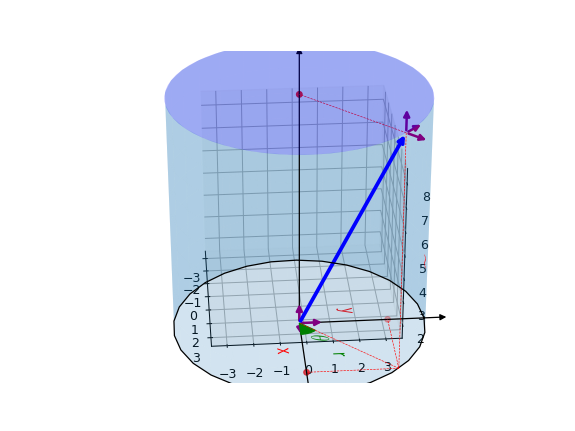

In [5]:
r = 5
t = np.pi/4
z = 10

coorcylind(r,t,z, margin=0.2)

# Todo
5. Add the volume the and surface element (it should change by position)